In [9]:
%load_ext autoreload
%autoreload 2

from SIClib import  classifyImg, getRandomPoints, extractFeat, setSize
import os
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


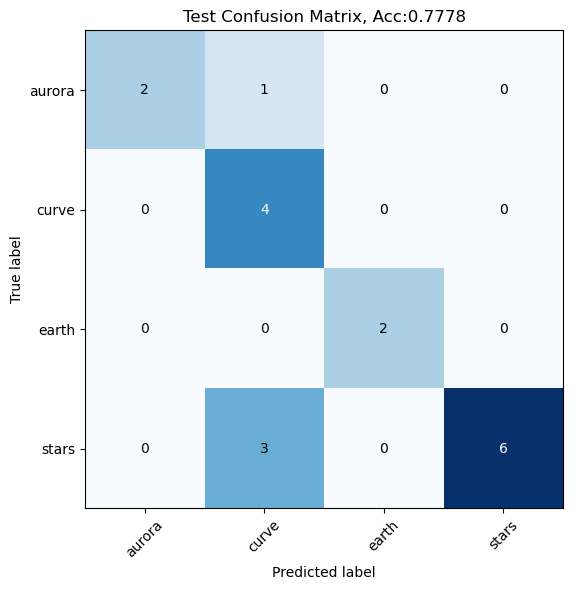

Test Accuracy: 0.7778

Training complete. Model saved as rf_model.rfm


In [11]:
# Set image size and random points for feature extraction
ss = 32
setSize(ss)

data_dir = '../data'
X = []
y = []
class_names = []

# Walk through each class folder
for class_idx, class_name in enumerate(sorted(os.listdir(data_dir))):
    class_path = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_path):
        continue
    class_names.append(class_name)
    for fname in os.listdir(class_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
            img_path = os.path.join(class_path, fname)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Feature extraction
            feat = extractFeat(img)
            X.append(feat)
            y.append(class_idx)

X = np.array(X)
y = np.array(y)
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=50,max_depth=None, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Save model and class names
dump(clf, f'rf_model_{acc:.4f}.rfm')
with open('rf_classes.txt', 'w') as f:
    for name in class_names:
        f.write(name + '\n')


# Plot confusion matrix with numbers
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Test Confusion Matrix, Acc:{acc:.4f}')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Print numbers inside the squares
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

print("\nTraining complete. Model saved as rf_model.rfm")